# Kaggle - nivel 1

## Segundo Modelo - Decision tree

seguimos con la competición Titanic Challenge visto en el punto 1

- v1.1_042020
- author and contact: [marcusRB](https://www.linkedin.com/in/marcusrb)
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

#### NOTA

El primer modelo aplicado es `Decision Trere` con los parámetros por defecto y solo intercalando las variables independientes `X` calculados por correlación.

En pasos sucesivos se verán otros modelos y así ir comparando los resultados.

## Check the versions of libraries

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.3
sklearn: 0.22.1


***

## Import Libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Save the model
import pickle
import joblib


## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


***

## Carga ficheros anteriores

In [15]:
# Carga de los ficheros anteriores ya preprocesados - cambiar la ruta según vuestro directorio o raíz
train_titanic = pd.read_csv('train_feat.csv')
test_titanic = pd.read_csv('test_feat.csv')

In [16]:
train_titanic.head(10)

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
5,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6,0,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,...,0,0,1,0,0,0,1,0,0,0
7,0,True,2.247470,0.767630,1.919564,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
8,1,False,-0.474545,2.008933,0.679295,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
9,1,False,0.432793,-0.473674,0.059160,0,False,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [17]:
test_titanic.head(10)

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.616992,-0.400248,0.105643,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,True,-0.499470,-0.400248,-0.553443,1,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,False,0.616992,0.619896,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
5,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,False,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
7,True,0.616992,0.619896,0.764728,0,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
8,False,-0.499470,-0.400248,-0.553443,1,False,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
9,True,1.733455,-0.400248,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


* * *

### Training and Validation dataset

cargamos el resto de columnas

In [19]:
id = pd.read_csv('test.csv')
PassengerId = id['PassengerId']

In [22]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [23]:
## Columnas de nuestro estudio de correlaciones
cols = pd.read_pickle('cols_feat.pkl')
cols

0    Index(['Title_Mrs', 'Title_Miss', 'InCabin', '...
1    [Sex, SibSp, FamilySize, IsAlone, InCabin, Pcl...
2    [Sex, SibSp, FamilySize, IsAlone, InCabin, Pcl...
3    [Sex, SibSp, Parch, FamilySize, IsAlone, InCab...
4    [Sex, FamilySize, InCabin, Pclass_3, FareGroup...
dtype: object

In [29]:
features = ['cols15', 'colsRNK10', 'colsRNK15', 'colsRNK20', 'colsSPT']
cols15 = cols[0]
colsRNK10 = cols[1]
colsRNK15 = cols[2]
colsRNK20 = cols[3]
colsSPT = cols[4]

In [34]:
cols15

Index(['Title_Mrs', 'Title_Miss', 'InCabin', 'Pclass_1', 'FareGroup_D',
       'Deck_B', 'Embarked_C', 'FamilySize', 'Deck_D', 'AgeGroup_Baby',
       'Deck_E', 'Parch', 'Deck_C', 'RoomGroup_r4', 'Pclass_2'],
      dtype='object')

* * *

## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

* * * 
## - Predictive Modeling - 

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) problems are one of the most common in machine learning. This is [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), that is, algorithms that, based on a set of tagged data, generalize a model that makes the most accurate prediction of the tag in a new set of data of the same type.

In this activity we will focus on showing different measures that we can use to evaluate a classification model.

### Decision tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.


Ahora que ya tenemos el conjunto de datos preparado para el análisis, crearemos diferentes modelos de predicción y los compararemos. Los modelos que crearemod seran los siguientes:

- Logistic Regression
- Decision Tree
- Random Forests
- k-nearest neigbours
- Support Vector Machines

Los evaluaremos con la métrica del área debajo de la curva ROC del modelo de predicción respecto los resultados, y escojeremos aquel modelo que tenga mejor resultado.

### `cols15`

In [36]:
# Split and drop Survived variable
X_ = train_titanic[cols15]
Y_ = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [37]:
X_train.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
331,0,0,True,1,0,0,0,-0.560975,0,0,0,-0.473674,1,1,0
733,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
382,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
704,0,0,False,0,0,0,0,0.059160,0,0,0,-0.473674,0,0,0
813,0,1,False,0,1,0,0,3.159833,0,0,0,2.008933,0,0,0


In [38]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [39]:
X_test.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
709,0,0,False,0,0,0,1,0.679295,0,0,0,0.767630,0,0,0
439,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
840,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
720,0,1,False,0,1,0,0,0.059160,0,0,0,0.767630,0,0,1
39,0,1,False,0,0,0,1,0.059160,0,0,0,-0.473674,0,0,0


In [40]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [41]:
# Create a performance_auc dict
performance_auc = {}

In [42]:
model1 = DecisionTreeClassifier().fit(X_train, y_train)
model1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
predicted_dt1 = model1.predict(X_test)
predicted_dt1

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [44]:
# Confidence score
dectree_score1 = round(model1.score(X_train,y_train) * 100, 2)
print(dectree_score1)
print(classification_report(y_test, predicted_dt1))

87.36
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

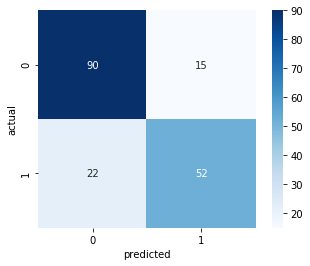

In [45]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt1)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

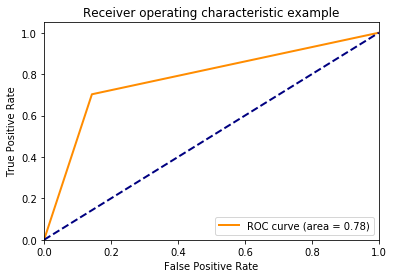

In [46]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt1)
roc_auc1 = auc(fpr, tpr)
performance_auc['Decision Tree_1'] = roc_auc1

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `RNK10`

In [47]:
# Split and drop Survived variable
X_ = train_titanic[colsRNK10]
Y_ = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [48]:
X_train.head()

,Sex,SibSp,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_S,FareGroup_A,...,Title_Master,Title_Mr,Title_Mrs,Title_Rare,Deck_B,Deck_D,Deck_E,Deck_G,Deck_N,RoomGroup_r3
331,True,-0.474545,-0.560975,1,True,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
733,True,-0.474545,-0.560975,1,False,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
382,True,-0.474545,-0.560975,1,False,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
704,True,0.432793,0.059160,0,False,0,0,1,1,1,...,0,1,0,0,0,0,0,0,1,0
813,False,3.154809,3.159833,0,False,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
model2 = DecisionTreeClassifier().fit(X_train, y_train)
model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
predicted_dt2 = model2.predict(X_test)
predicted_dt2

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1])

In [51]:
# Confidence score
dectree_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(dectree_score2)
print(classification_report(y_test, predicted_dt2))

92.28
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

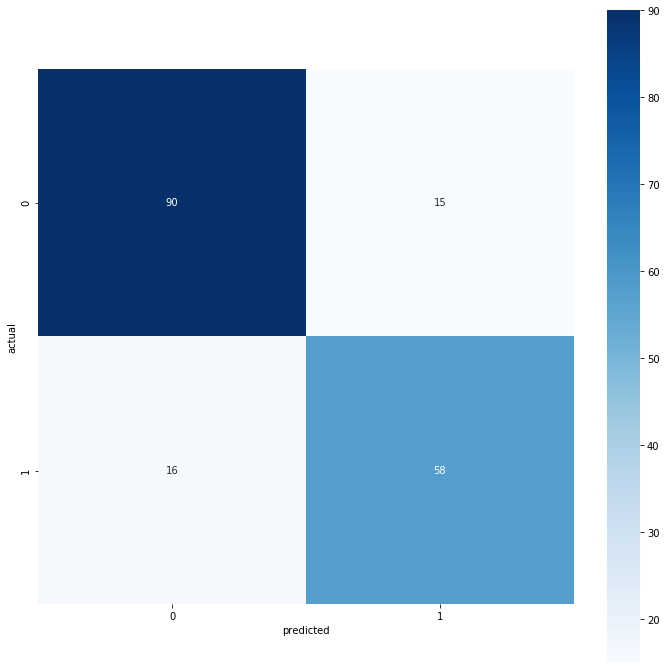

In [52]:
# Create a confusion matrix
plt.figure(figsize=(12,12))
matrix = confusion_matrix(y_test, predicted_dt2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

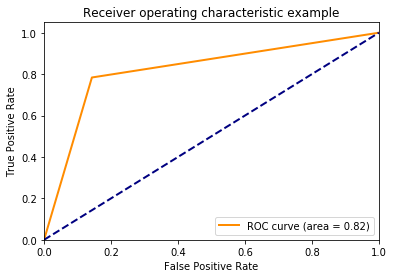

In [53]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Decision Tree_2'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `RNK20`

In [54]:
# Split and drop Survived variable
X_ = train_titanic[colsRNK20]
Y_ = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [55]:
X_train.head()

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Title_Rare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r3,RoomGroup_r4
331,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
733,True,-0.474545,-0.473674,-0.560975,1,False,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
382,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
704,True,0.432793,-0.473674,0.059160,0,False,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
813,False,3.154809,2.008933,3.159833,0,False,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
model3 = DecisionTreeClassifier().fit(X_train, y_train)
model3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
predicted_dt3 = model3.predict(X_test)
predicted_dt3

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1])

In [58]:
# Confidence score
dectree_score3 = round(model3.score(X_train,y_train) * 100, 2)
print(dectree_score3)
print(classification_report(y_test, predicted_dt3))

92.84
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

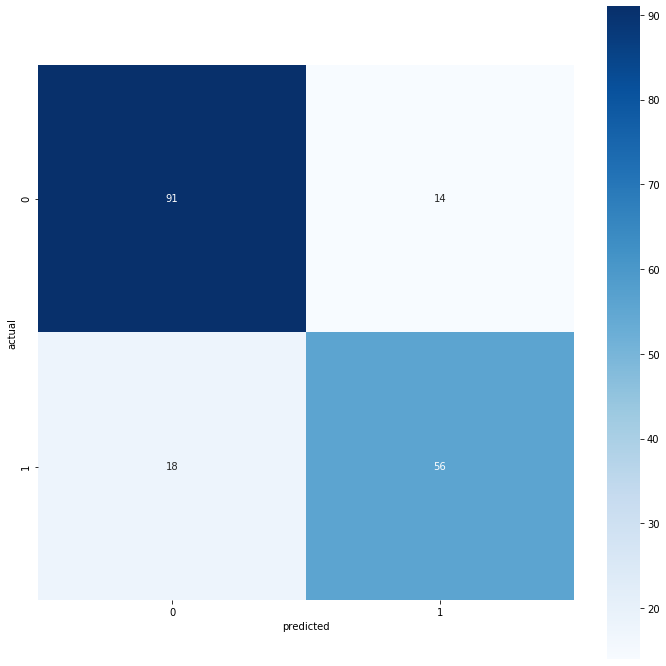

In [59]:
# Create a confusion matrix
plt.figure(figsize=(12,12))
matrix = confusion_matrix(y_test, predicted_dt3)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

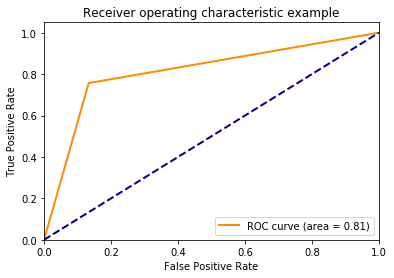

In [60]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt3)
roc_auc3 = auc(fpr, tpr)
performance_auc['Decision Tree_3'] = roc_auc3

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `SPT`

In [61]:
# Split and drop Survived variable
X_ = train_titanic[colsSPT]
Y_ = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [62]:
X_train.head()

,Sex,FamilySize,InCabin,Pclass_3,FareGroup_A,FareGroup_B,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Senior,Title_Master,Title_Mr,Title_Mrs,Title_Rare,Deck_B,Deck_D,Deck_E,Deck_G
331,True,-0.560975,True,0,0,0,1,0,0,0,1,0,0,0,0,0,0
733,True,-0.560975,False,0,0,1,0,0,0,0,1,0,0,0,0,0,0
382,True,-0.560975,False,1,0,1,0,0,0,0,1,0,0,0,0,0,0
704,True,0.059160,False,1,1,0,0,0,0,0,1,0,0,0,0,0,0
813,False,3.159833,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
model4 = DecisionTreeClassifier().fit(X_train, y_train)
model4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
predicted_dt4 = model4.predict(X_test)
predicted_dt4

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [65]:
# Confidence score
dectree_score4 = round(model4.score(X_train,y_train) * 100, 2)
print(dectree_score4)
print(classification_report(y_test, predicted_dt4))

88.76
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

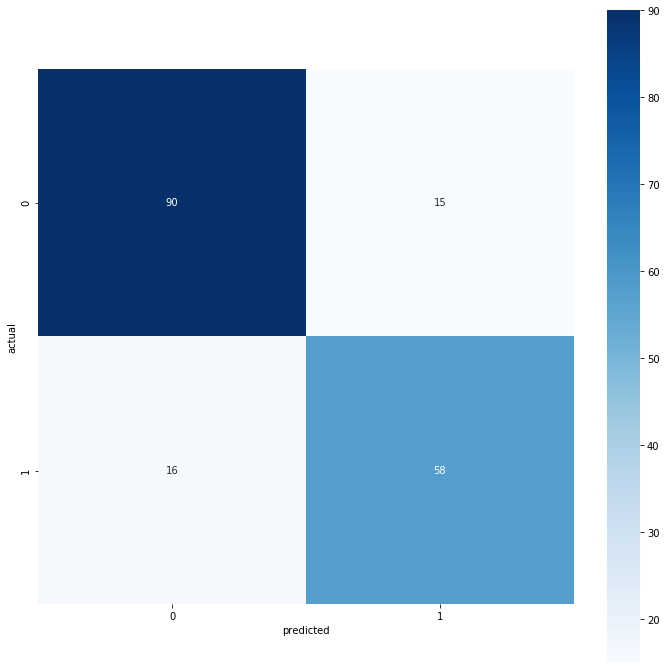

In [66]:
# Create a confusion matrix
plt.figure(figsize=(12,12))
matrix = confusion_matrix(y_test, predicted_dt4)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

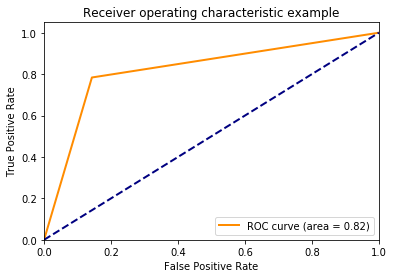

In [67]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt4)
roc_auc4 = auc(fpr, tpr)
performance_auc['Decision Tree_4'] = roc_auc4

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [68]:
performance_auc

{'Decision Tree_1': 0.7799227799227799,
 'Decision Tree_2': 0.8204633204633205,
 'Decision Tree_3': 0.8117117117117117,
 'Decision Tree_4': 0.8204633204633205}

## Conclusion and Model Evaluation

Después de aplicar diferentes modelos de clasificación, y viendo que no hay demasiadas diferencias de rendimiento entre ellos, el que mejor resultado nos ha dado con la métrica que hemos escogido ha sido el de Support Vector Machines.


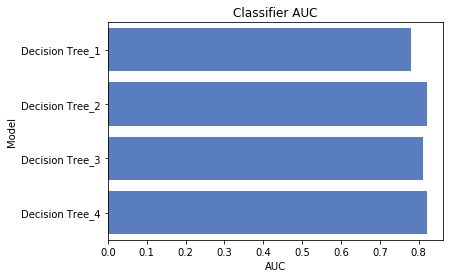

In [69]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [70]:
models = pd.DataFrame({
    'Model': ['cols15', 'colsRNK10', 
             'colsRNK15','colsSPT'],
    'Score': [dectree_score1, 
              dectree_score2, 
              dectree_score3, 
              dectree_score4
             ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,colsRNK15,92.84
1,colsRNK10,92.28
3,colsSPT,88.76
0,cols15,87.36


## Validation with Decision Tree model

In [72]:
# Testing with Decision Tree
X_val = test_titanic[cols15]
predicted_DT = model1.predict(X_val)
predicted_DT

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [73]:
len(predicted_DT)

418

In [74]:
# We submit predicted random forest results
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": predicted_DT
    })
submission.to_csv('submission_DT.csv', index=False)

In [75]:
pd.read_csv("submission_DT.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


* * * 

## Kaggle Submission

https://github.com/Kaggle/kaggle-api

In [ ]:
import kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions submit titanic -f submission_DT.csv -m "DecisionTree colsRNK5"

In [ ]:
!kaggle competitions submissions titanic